# Text Classification mit XGBoost

In [5]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import xgboost as xgb# used model

In [17]:
import pickle

In [6]:
train_stop = pd.read_csv('../../../Data-Preparation/traindata_with_stopwords_preprocessed.csv')

In [7]:
train_stop.head()

,Text,target,Ground_Truth_Label
0,Rise and shining lol. I'm up a few mins later ...,4,positive
1,Had a 2nd interview today. It's looking promis...,4,positive
2,@EmilyAlbracht I feel your pain!,0,negative
3,http://twitpic.com/6sdbj - 4yr old son and I w...,4,positive
4,is lonely because all my housemates have gone ...,0,negative


## Vorbereitung

In [8]:
train_stop['target'] = train_stop['target'].replace(4,1)


In [9]:
X_train_stop = train_stop.drop(['target', 'Ground_Truth_Label'], axis=1).copy()


In [10]:
Y_train_stop = train_stop['target'].copy()


## Modelltraining mit Stopwords

In [11]:
vectorizer = TfidfVectorizer()
# astype(str) is necesarry 
X_training_stop = vectorizer.fit_transform(X_train_stop['Text'].astype(str))


In [12]:
model = xgb.XGBClassifier(n_jobs = -1)
model.fit(X_training_stop, Y_train_stop)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
predictions_stop = model.predict(X_training_stop)

In [14]:
accuracy = accuracy_score(Y_train_stop, predictions_stop)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 76.15%


## Evaluation

In [15]:
# calculate metrics
accuracy = accuracy_score(Y_train_stop, predictions_stop)
precision = precision_score(Y_train_stop, predictions_stop, pos_label=1)
recall = recall_score(Y_train_stop, predictions_stop, pos_label=1)
f1 = f1_score(Y_train_stop, predictions_stop, pos_label=1)

# visualize metrics
print('XGBoost with Stopwords')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print()

XGBoost with Stopwords
Accuracy: 0.76
Precision: 0.74
Recall: 0.80
F1 Score: 0.77



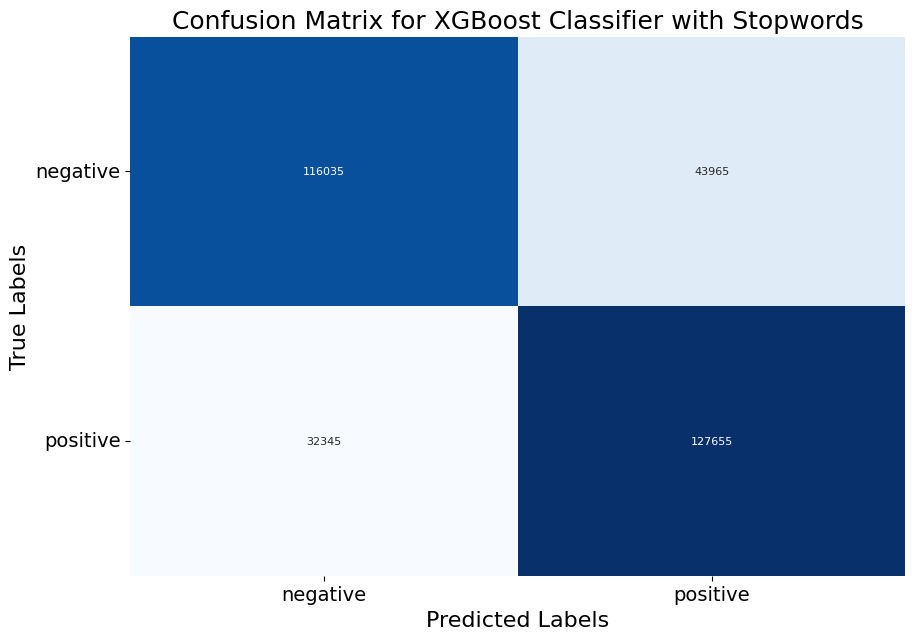

In [16]:
cm_nb = confusion_matrix(Y_train_stop, predictions_stop)


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 8})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for XGBoost Classifier with Stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()